# Data Visulaization with Haberman Dataset

## Haberman dataset

Dataset: Haberman Dataset: [https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1#haberman.csv]
* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicagos Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute)
* Attribute Information:
* Age of patient at time of operation (numerical)
* Patients year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
* Missing Attribute Values: None
* Objective: Classify a new Patient as belonging to one of the 2 classes given the 4 features.
* Importance of domain knowledge: 
                            *https://www.medicalnewstoday.com/articles/319713.php
                            *https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes                         
                            


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Haberman.csv into a pandas dataFrame.
Haberman = pd.read_csv("haberman.csv")

In [19]:
print (Haberman.shape)
print (Haberman.columns)

(306, 4)
Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')


In [20]:
Haberman.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
#How many data points for each class are present? 
Haberman["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

We clearly observe an imbalanced dataset with 82% of class-1 and 18% of class2 distribution. We need to balance the 
output variable (response variable - Surv_status)by using under smapling, over sampling or extrapolation methods.

## Histogram, PDF, CDF - Univariate Anlaysis 

/Users/sanjana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


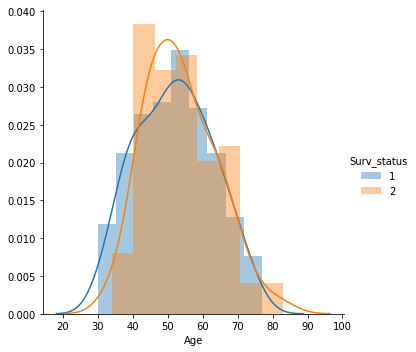

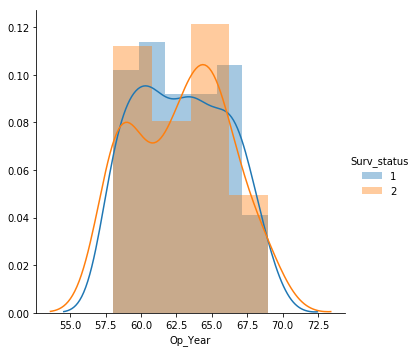

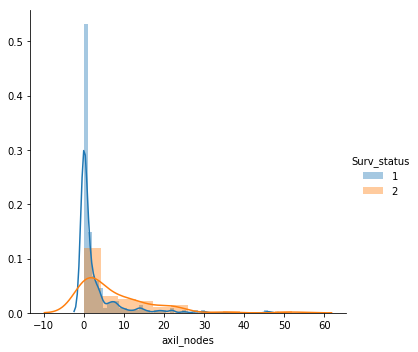

In [13]:
# Plotting PDF
sns.FacetGrid(Haberman, hue="Surv_status", height=5)\
   .map(sns.distplot, "Age")\
   .add_legend();
plt.show();

sns.FacetGrid(Haberman, hue="Surv_status", height=5)\
   .map(sns.distplot, "Op_Year")\
   .add_legend();
plt.show();

sns.FacetGrid(Haberman, hue="Surv_status", height=5)\
   .map(sns.distplot, "axil_nodes")\
   .add_legend();
plt.show();



* We observe that there is a lot of overlap in each variable for Surv_status 1 and 2 in the PDF plots
* Clearly one variable alone cannot help in classifying output.
* Axil nodes is clearly right skewed, whhere age seems to be almost gaussian or normal

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


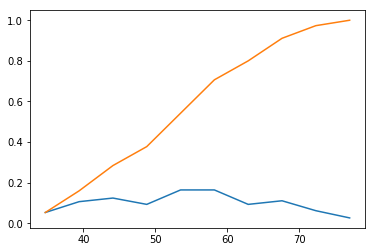

In [34]:
# Plot Cdf
Haberman_1 = Haberman.loc[Haberman["Surv_status"] == 1];
Haberman_2 = Haberman.loc[Haberman["Surv_status"] == 2];



counts, bin_edges = np.histogram(Haberman_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


[0.29333333 0.17333333 0.2        0.16444444 0.16888889]
[58.  60.2 62.4 64.6 66.8 69. ]


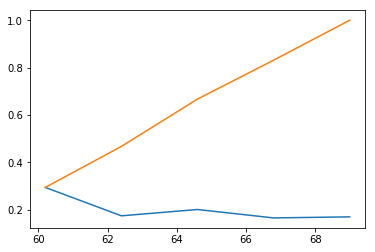

In [35]:
counts, bin_edges = np.histogram(Haberman_1['Op_Year'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




[0.91555556 0.04888889 0.02222222 0.00888889 0.00444444]
[ 0.   9.2 18.4 27.6 36.8 46. ]


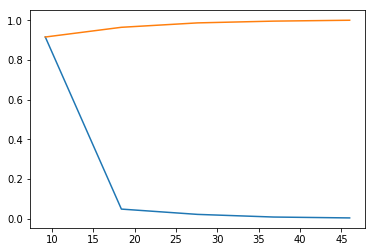

In [36]:

counts, bin_edges = np.histogram(Haberman_1['axil_nodes'], bins=5, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

* We can interpret cumulative probability density functions for class 1 of survival status for all 3 features, 
* We observe that the almost 95% of observations lie around 10 axil nodesfor class 1



[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


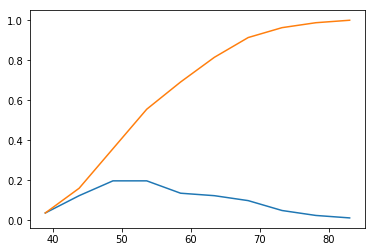

In [37]:
counts, bin_edges = np.histogram(Haberman_2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


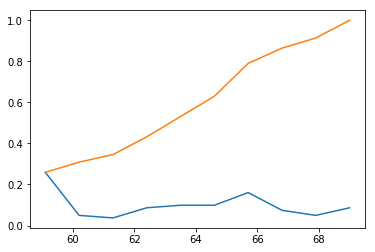

In [38]:
counts, bin_edges = np.histogram(Haberman_2['Op_Year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


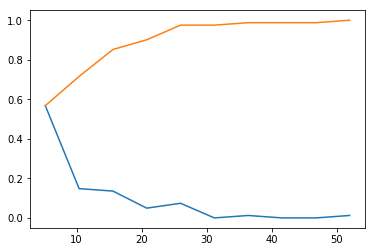

In [39]:
counts, bin_edges = np.histogram(Haberman_2['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

* We can interpret cumulative probability density functions for class 2 of survival status for all 3 features, 
* We observe that the almost 60% of observations lie around 5 axil nodes for class 2

## Median, Percentile, Quantile, IQR, MAD

In [44]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Haberman_1["axil_nodes"]))
print(np.median(Haberman_2["axil_nodes"]))

print("\nQuantiles:")
print(np.percentile(Haberman_1["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(Haberman_2["axil_nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(Haberman_1["axil_nodes"],90))
print(np.percentile(Haberman_2["axil_nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_1["axil_nodes"]))
print(robust.mad(Haberman_2["axil_nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


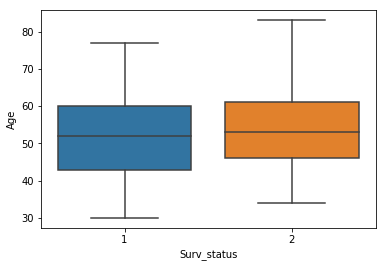

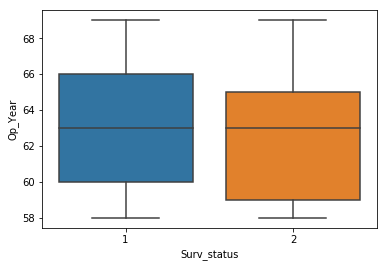

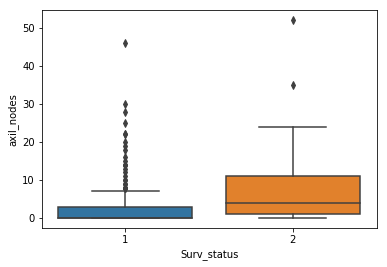

In [47]:

#Box-plot 
sns.boxplot(x='Surv_status',y='Age', data=Haberman)
plt.show()
sns.boxplot(x='Surv_status',y='Op_Year', data=Haberman)
plt.show()
sns.boxplot(x='Surv_status',y='axil_nodes', data=Haberman)
plt.show()

In [ ]:
* We observe alot of outliers in axil nodes attribute for Surv_status = 1
* We observe almost similar distribution for Surv_status 1 and 2 in Op_Year and Age

## Pair-plot - Bivariate Analysis


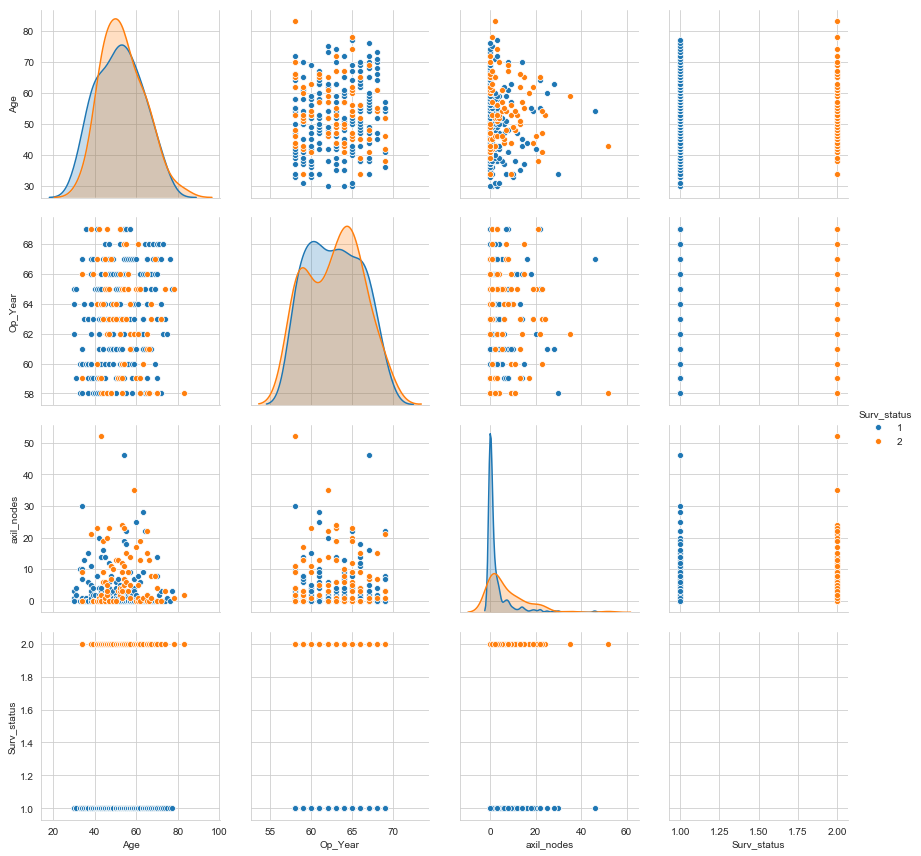

In [50]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(Haberman, hue="Surv_status", height=3);
plt.show()

* We observe a lot of overlap, clearly no two variables help in classifying the variables, multivariate appraoch is required for identifying the clasification.

## Summary Statistics

In [53]:
# summary statistics
Haberman.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
Observations:
* Its is always good start with some basic EDA of any dataset, Summary Statistics, boxplot, scatterplots, check for balanced or imbalanced dataset.
